<a href="https://colab.research.google.com/github/AJAX6255/Son_of_hyrax/blob/main/vector_db_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 🌐 Colab

This notebook is designed to be run on Google Colab (it runs fastes on GPU).

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AJAX6255/Son_of_hyrax/blob/main/vector_db_demo.ipynb)

# Vector Database Demo

A vector database allows for efficient similarity searches by managing a data structure on behalf of the user that defines a distant between any two vectors. This allows the user to query the database for similar vectors given an input vector. In this notebook, we'll see how to use the Hyrax to work with the built in vector database.

As usual, we'll start by creating an instance of a `Hyrax` object and then quickly `train` the default HyraxAutoencoder. After than we'll run some data through `infer` to produce our encoded vectors.

In [2]:
# If NOT RUNNING on Colab; create a Conda environment first
# conda create -n hyrax python=3.12 (or your preferred Python 3.9+ version)
# conda activate hyrax
# uncomment and run the following code line for first time hyrax run on colab

import subprocess
import sys

def is_package_installed(package_name):
    try:
        subprocess.run([sys.executable, "-m", "pip", "show", package_name], capture_output=True, check=True)
        return True
    except subprocess.CalledProcessError:
        return False

if not is_package_installed("hyrax"):
    print("Installing hyrax...")
    !pip install hyrax
    print("Restarting runtime to load installed package...")
    get_ipython().runtime.restart_session()
else:
    print("hyrax is already installed.")

Installing hyrax...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 7.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.7/162.7 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 109.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 101.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.2/343.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66

Restarting runtime to load installed package...


AttributeError: 'Shell' object has no attribute 'runtime'

In [3]:
# prompt: lets list the version of hyrax here

!pip show hyrax

Name: hyrax
Version: 0.3.2
Summary: 
Home-page: 
Author: 
Author-email: LINCC Frameworks <mtauraso@uw.edu>
License: MIT License

Copyright (c) 2024 LINCC Frameworks

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY C

In [20]:
import tomlkit
import os

# Define the paths for the data directories
raw_data_dir = "/content/data"
processed_data_dir = "/content/processed_data"
results_dir = "results"
model_dir = "models"
vector_db_dir = "vector_db"
plot_dir = "plots"


# Create the directories if they don't exist
os.makedirs(raw_data_dir, exist_ok=True)
os.makedirs(processed_data_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)
os.makedirs(model_dir, exist_ok=True)
os.makedirs(vector_db_dir, exist_ok=True)
os.makedirs(plot_dir, exist_ok=True)


print(f"Created directory: {raw_data_dir}")
print(f"Created directory: {processed_data_dir}")
print(f"Created directory: {results_dir}")
print(f"Created directory: {model_dir}")
print(f"Created directory: {vector_db_dir}")
print(f"Created directory: {plot_dir}")


default_config_content = """
# SPDX-FileCopyrightText: 2024 LINCC Frameworks
#
# SPDX-License-Identifier: MIT

# This is the main hyrax configuration file
[general]
# Set the logging level
log_level = "INFO" # DEBUG, INFO, WARNING, ERROR, CRITICAL
# Set the random seed for reproducibility
# random_seed = 42 # Removed as it caused a RuntimeError
# The base directory for saving results
results_dir = "{results_dir}"

[data]
# The name of the dataset to use
dataset_name = "example_data"
# The directory where the raw data is stored
raw_data_dir = "{raw_data_dir}"
# The directory where the processed data is stored
processed_data_dir = "{processed_data_dir}"

[train]
# The name of the model to use
# model_name = "HyraxAutoencoder" # Removed as it caused a RuntimeError
# The directory to save trained models
model_dir = "{model_dir}"
# The number of training epochs
epochs = 10
# The batch size for training
batch_size = 512
# The learning rate for the optimizer
learning_rate = 0.001
# The optimizer to use
optimizer = "Adam"
# The loss function to use
loss_function = "CrossEntropyLoss"
# The device to use for training (e.g., "cuda" or "cpu")
device = "cuda"
# The interval at which to save checkpoints (in epochs)
checkpoint_interval = 5
# Whether to use early stopping
early_stopping = true
# The patience for early stopping (number of epochs to wait for improvement)
early_stopping_patience = 10
# The minimum change in the monitored quantity to qualify as an improvement for early stopping
early_stopping_min_delta = 0.001

[infer]
# The batch size for inference
batch_size = 512
# The device to use for inference (e.g., "cuda" or "cpu")
device = "cuda"
# The directory to save inference results
infer_results_dir = "inference_results"

[vector_db]
# The name of the vector database to use
name = "chromadb"
# The directory to store the vector database
db_dir = "{vector_db_dir}"
# The collection name to use in the vector database
collection_name = "hyrax_collection"

[plot]
# The directory to save plots
plot_dir = "{plot_dir}"
# The format to save plots (e.g., "png", "jpg", "svg")
plot_format = "png"

[example_data]
# Parameters specific to the example_data dataset
# The name of the FITS file containing the data
fits_file = "example_data.fits"
# The extension in the FITS file containing the data
fits_ext = 1
# The columns to use from the FITS file
use_columns = ["flux_g", "flux_r", "flux_i", "flux_z", "flux_y", "flux_w1", "flux_w2"]
# The number of samples to use from the dataset (set to -1 to use all samples)
num_samples = 10000
# The size of the validation set (as a fraction of the total data)
validation_split = 0.2
""".format(
    raw_data_dir=raw_data_dir,
    processed_data_dir=processed_data_dir,
    results_dir=results_dir,
    model_dir=model_dir,
    vector_db_dir=vector_db_dir,
    plot_dir=plot_dir
)

# Define the path for the custom config file
custom_config_path = "/content/custom_hyrax_config.toml"

# Write the content to the file
with open(custom_config_path, "w") as f:
    f.write(default_config_content)

print(f"Custom configuration saved to: {custom_config_path}")

Created directory: /content/data
Created directory: /content/processed_data
Created directory: results
Created directory: models
Created directory: vector_db
Created directory: plots
Custom configuration saved to: /content/custom_hyrax_config.toml


Now you can modify the `custom_hyrax_config.toml` file in the `/content/` directory to change any settings you need.

Once you have modified the file, you can instantiate the `Hyrax` object using your custom configuration like this:

In [26]:
# This is cell c16076f5

from hyrax import Hyrax

# Specify the path to your custom config file
# custom_config_path = "/content/custom_hyrax_config.toml"

# Instantiate Hyrax with the custom config
# h = Hyrax(config_file=custom_config_path)

# Instantiate Hyrax with the default config
h = Hyrax()

# Increase log level for more verbose output
h.config["general"]["log_level"] = "DEBUG"

# Now you can proceed with train, infer, and saving to the database using your custom configuration

[2025-05-24 23:46:58,738 hyrax:INFO] Runtime Config read from: /usr/local/lib/python3.11/dist-packages/hyrax/hyrax_default_config.toml
INFO:hyrax:Runtime Config read from: /usr/local/lib/python3.11/dist-packages/hyrax/hyrax_default_config.toml


In [23]:
h.config["train"]["epochs"] = 25
h.train()
h.infer()

100%|██████████| 170M/170M [00:13<00:00, 12.9MB/s]
[2025-05-24 23:17:31,883 hyrax.models.model_registry:INFO] Using criterion: torch.nn.CrossEntropyLoss with default arguments.
INFO:hyrax.models.model_registry:Using criterion: torch.nn.CrossEntropyLoss with default arguments.
2025-05-24 23:17:31,951 ignite.distributed.auto.auto_dataloader INFO: Use data loader kwargs for dataset '<hyrax.data_sets.hyr': 
	{'sampler': <hyrax.pytorch_ignite.SubsetSequentialSampler object at 0x7e82dcaa4a10>, 'batch_size': 512, 'shuffle': False, 'pin_memory': True}
2025-05-24 23:17:31,952 ignite.distributed.auto.auto_dataloader INFO: Use data loader kwargs for dataset '<hyrax.data_sets.hyr': 
	{'sampler': <hyrax.pytorch_ignite.SubsetSequentialSampler object at 0x7e82dd608cd0>, 'batch_size': 512, 'shuffle': False, 'pin_memory': True}
/usr/local/lib/python3.11/dist-packages/ignite/handlers/tqdm_logger.py:127: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to 

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

[2025-05-24 23:22:49,441 hyrax.pytorch_ignite:INFO] Total training time: 316.97[s]
INFO:hyrax.pytorch_ignite:Total training time: 316.97[s]
[2025-05-24 23:22:49,443 hyrax.pytorch_ignite:INFO] Latest checkpoint saved as: /content/results/20250524-231703-train-5xSo/checkpoint_epoch_25.pt
INFO:hyrax.pytorch_ignite:Latest checkpoint saved as: /content/results/20250524-231703-train-5xSo/checkpoint_epoch_25.pt
[2025-05-24 23:22:49,446 hyrax.pytorch_ignite:INFO] Best metric checkpoint saved as: /content/results/20250524-231703-train-5xSo/checkpoint_25_loss=-94.2283.pt
INFO:hyrax.pytorch_ignite:Best metric checkpoint saved as: /content/results/20250524-231703-train-5xSo/checkpoint_25_loss=-94.2283.pt
2025/05/24 23:22:49 INFO mlflow.system_metrics.system_metrics_monitor: Stopping system metrics monitoring...
2025/05/24 23:22:49 INFO mlflow.system_metrics.system_metrics_monitor: Successfully terminated system metrics monitoring!
[2025-05-24 23:22:49,469 hyrax.train:INFO] Finished Training
INFO:h

  1%|1         | 1/98 [00:00<?, ?it/s]

[2025-05-24 23:23:17,160 hyrax.pytorch_ignite:INFO] Total evaluation time: 13.93[s]
INFO:hyrax.pytorch_ignite:Total evaluation time: 13.93[s]
[2025-05-24 23:23:17,249 hyrax.verbs.infer:INFO] Inference Complete.
INFO:hyrax.verbs.infer:Inference Complete.
[2025-05-24 23:23:17,301 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.
[2025-05-24 23:23:17,303 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.
[2025-05-24 23:23:39,200 hyrax.config_utils:WARNING] Cannot find default_config.toml for umap.


Enableing Support for third party widgets - this will remain active for the duration of the session. It is disabled in the last cell.

In [24]:
from google.colab import output
output.enable_custom_widget_manager()

Now we'll use the output of inference to populate a ChromaDB vector database. By default `h.save_to_database()` will find the most recent output from `h.infer()` to use as the inputs when filling the database, but the user can specify a different dataset. Likewise, the default behavior is to create a new directory to store the vector database, but this can also be specified.

`h.save_to_database([input_dir="/path/to/input",] [output_dir="/path/to/output"])`

Note: If the goal is to add more data to an existing database, provide the existing database directory as the `output_dir` when calling `h.save_to_database`.

In [27]:
# This is cell 6b8e25f1
print(f"Configured vector database directory: {h.config['vector_db']['db_dir']}")
print(f"Filling a {h.config['vector_db']['name']} database with the results of inference.")
h.save_to_database()

Filling a chromadb database with the results of inference.


TypeError: 'NoneType' object is not callable

Now that the vector database has been populated, it can be used for similarity search and nearest neighbors. First we'll need to establish a connection using `h.database_connection()`.

With the connection established, we have access to three types of queries:
* `get_by_id` to retrieve the vector associated with a particular id
* `search_by_id` to retrieve the _k_ nearest neighbors to a particular id
* `search_by_vector` to retrieve the _k_ nearest neighbors to a particular input vector

In [ ]:
conn = h.database_connection()

### `get_by_id`

With `get_by_id` we can retrieve the vectors associated with some ids. The result is a dictionary where the keys are id strings and values are the numpy array vectors stored in the vector database.

In [ ]:
results = conn.get_by_id(ids=["334", "19022"])

for k, v in results.items():
    print(f"Id: {k}, Vector: {v}")

Id: 334, Vector: [ 0.21406414  4.38409519  0.49727368 -0.7893768  -2.87350202  0.11476225
  1.8274399  -0.09784815 -1.2193296  -0.77086699  1.34052861  1.65932298
 -2.07148337 -2.34664512  2.28803968  0.86179125  0.86639947 -2.3657589
 -1.03186095  1.59934366 -0.38279176 -0.92782491 -1.26808596  1.49409449
 -2.36837769 -2.97786927 -1.81079423 -1.38344455 -1.11257839  1.33133769
  0.86067116 -2.94752669  0.02824669  1.38922858 -0.20957161 -0.15272772
  0.01273713 -0.05502158 -0.28467956 -0.06139451 -1.35991454 -0.46939212
 -1.15573668 -3.90672135  1.14438629  4.01489925  0.87542021 -1.55964196
 -0.27592164  1.35570014 -0.8417064   0.40743572 -0.45822605  0.36299995
 -4.36139441 -0.92870319  1.6725179  -0.35636529  0.2801117  -1.55952835
 -2.01857901  0.28982323 -2.65234852  2.10563254]
Id: 19022, Vector: [ 1.01997221  3.27541471  0.07880742  0.40190896 -2.069767    0.22248952
  0.63698471  0.91667783 -1.42546344 -0.78596801  1.58609724  0.09808031
 -2.03873038 -1.99726641  1.99178457  0

### `search_by_id`

Now we'll search for nearest neighbors. First we search for the _k_ nearest neighbors of using an id from the database. Note that the closest of the 5 neighbors is the vector itself, since it's in the database. The returned dictionary contains the ids of the nearest neighbors in order of increasing distance.

In [ ]:
conn.search_by_id("19022", k=5)

{'19022': ['19022', '431', '30105', '4532', '27167']}

### `search_by_vector`

We can repeat the search this time using the vector that we found when running `get_by_id`. The results from this search should match the previous results from `search_by_id`. Again, the returned dictionary contains the ids of the nearest neighbors in order of increasing distance.

Note that the input vector to `search_by_vector` is a list of vectors. Also the input vectors don't need to be vectors extracted from the database. For example - if a new piece of data was run through `infer`, the resulting vector could be passed as input to `search_by_vector` to find similar data. This is why the keys of the returned dictionary are integers, they are the indexes of the input vectors.

In [ ]:
neighbors = conn.search_by_vector([results["19022"]], k=5)
neighbors

{0: ['19022', '431', '30105', '4532', '27167']}

We have now successfully queried our vector database. Let's take a look at the nearest neighbors that were found for the example image. First we'll get an interactive copy of the original dataset, and write a couple of helpful plotting functions so that we can plot the original images.

In [ ]:
dataset = h.prepare()

[2025-05-20 15:05:15,134 hyrax.prepare:INFO] Finished Prepare


The following is some boilerplate code for displaying either a single image or a collection of images from `dataset`.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt


def show_image(data):
    image = data["image"]
    title = f"Label: {data['label']}, Id: {data['object_id']}"
    image = image.permute(1, 2, 0).numpy()
    min_val = np.min(image)
    max_val = np.max(image)
    image = (image - min_val) / (max_val - min_val)
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.axis("off")
    plt.show()


def show_image_grid(data_list):
    """
    Display a grid of images.

    Parameters
    ----------
    data_list : list
        A list of data dictionaries, each containing an 'image' key and optionally 'label' and 'object_id'.
    """
    rows = int(len(data_list) / 4)
    if len(data_list) % 4 != 0:
        rows += 1
    cols = 4
    if rows == 1:
        cols = len(data_list)
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    axes = axes.flatten()  # Flatten the axes for easy iteration

    for ax, data in zip(axes, data_list):
        image = data["image"]
        title = f"Label: {data.get('label', 'N/A')}, Id: {data.get('object_id', 'N/A')}"
        image = image.permute(1, 2, 0).numpy()
        min_val = np.min(image)
        max_val = np.max(image)
        image = (image - min_val) / (max_val - min_val)  # Normalize to [0, 1]
        ax.imshow(image)
        ax.set_title(title)
        ax.axis("off")

    # Turn off any unused axes
    for ax in axes[len(data_list) :]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()

First we'll display the image that we used for searching.

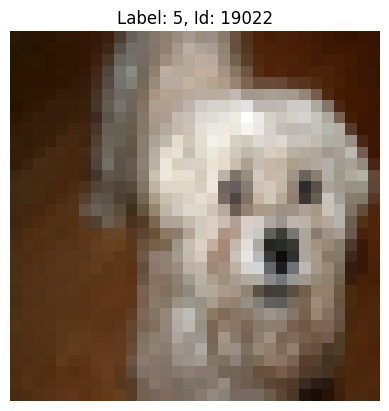

In [ ]:
show_image(dataset[19022])

Next we'll display the 4 nearest neighbors. We'll exclude the absolute nearest neighbor, because in our case, that is the original search image. It seems that the model is doing something vaguely reasonable. By eye, some of the nearest neighbors appear similar to the original search image. Though, clearly, there is room for model improvement.

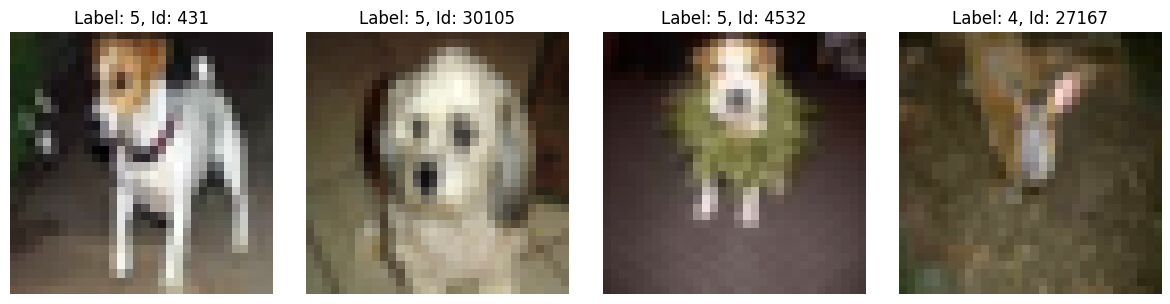

In [ ]:
data_list = [dataset[int(n)] for n in neighbors[0][1:]]
show_image_grid(data_list)

In [ ]:
#This ensures that custom widget support is available for all the cells that might require it throughout your notebook,
# and you only disable it when you are finished with all the interactive elements.
from google.colab import output
output.disable_custom_widget_manager()